## Important Information

- Email: [joanna_bieri@redlands.edu](mailto:joanna_bieri@redlands.edu)
- Office Hours take place in Duke 209 -- [Office Hours Schedule](https://joannabieri.com/schedule.html)
- [Class Website](https://joannabieri.com/data201.html)
- [Syllabus](https://joannabieri.com/data201/IntermediateDataScience.pdf)

## Supervised vs. Unsupervised

So far in this class we have talked about three basic machine learning techniques:

- K-Nearest Neighbors (KNN) - we predict the class that a new observation belongs to by considering it's nearest neighbors.
- Linear Regression - we predict a continuous numerical value based on a linear fit. For a nonlinear fit we let our parameters use polynomial features.
- Logistic Regression - we predict the class of a new observation based on assuming a linear fit for the log odds and solve for a probability.

All of these are supervised methods.

### Supervised

In supervised learning you have a **labeled** data set, meaning that you have some examples of what the answers are. Each observation has a know output (or target)

Examples:

- Predicting house prices based on a bunch of observations where you have house prices for each of those observation.
- Recognizing pictures of dogs and cats when you have a bunch of photos where someone has labeled the photos as dog or cat.

In supervised learning you are learning a mapping from the inputs (variables) to the outputs (targets).

### Unsupervised

In unsupervised learning you have an **unlabeled** data set, meaning that you only have features or variables. You are trying to learn some underlying structure or patterns within the data.

Examples:

- Trying to learn how to segment (cluster) customers based on variables like purchases, likes, views. In this case you don't know what the groups are or even how many groups there are - you are hoping to figure out which customers are similar.
- You have a large many dimensional data set and you are trying to understand which features are most important. You might do an unsupervised dimensionality reduction.

In unsupervised learning you are learning patterns in the data from only the inputs (variables). You do not know the labels.

## Continue with Supervised Learning

Today we will do a deeper dive into ways to make different or better predictions with KNN and Linear Regression. We will talk more about over and underfitting. This should build on what we did last class!

In [11]:
# NOTE - This list of package imports is getting long
# In a professional setting you would only want to 
#      import what you need!

# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

# ML packages
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, classification_report

## K-Nearest Neighbors (KNN)

K-Nearest Neighbors is a supervised learning algorithm that is based on the idea that similar data points exist close to each other in feature space. We have see how we can use KNN for classification, but it can be used for both classification and regression.

## Intuition

Imagine you have a set of labeled data points plotted in space.
To predict the label of a **new, unlabeled point**, KNN looks at the **K closest points** (its *neighbors*) and assigns the most common label among them.




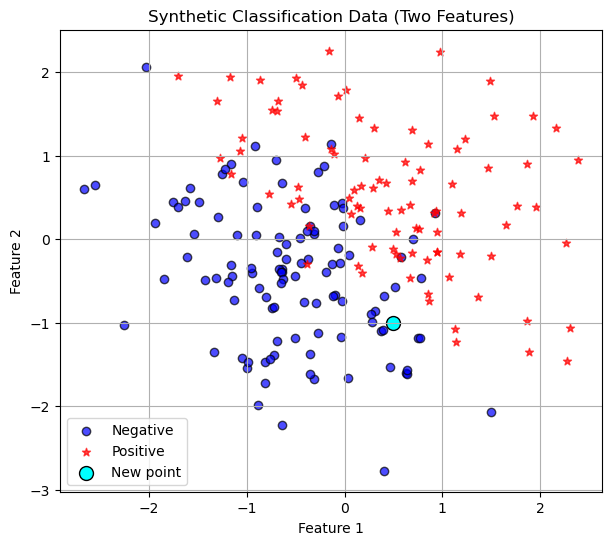

In [13]:
# Generate synthetic binary classification data
np.random.seed(0)
n_samples = 200
X1 = np.random.randn(n_samples, 2)
y1 = (X1[:,0] + X1[:,1] + 0.5 * np.random.randn(n_samples) > 0).astype(int)

new_point = np.array([[0.5, -1.0]])

# Scatter plot
plt.figure(figsize=(7,6))
plt.scatter(X1[y1==0, 0], X1[y1==0, 1], 
            color='blue', alpha=0.7, 
            label='Negative', edgecolor='k')
plt.scatter(X1[y1==1, 0], X1[y1==1, 1], 
            color='red', alpha=0.7, marker='*', label='Positive')
plt.scatter(new_point[0, 0], new_point[0, 1], 
            color='cyan', s=100, 
            label='New point', edgecolor='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic Classification Data (Two Features)")
plt.legend()
plt.grid(True)
plt.show()

## Training Data

In this case the training data is existing data points with any number of features. In the picture above we have two features so we can plot the data points in 2-dimensions. Now given a new points we do the following algorithm.

## Algorithm Steps

1. Choose a value for **K** (the number of neighbors to consider).
2. Calculate the **distance** between the new data point and all training points  
   (commonly using *Euclidean distance*).
3. Select the **K nearest neighbors** based on smallest distances.
4. For **classification**:
   - Take a **majority vote** of the neighbors’ classes.
   For **regression**:
   - Take the **average** of the neighbors’ target values.
5. Return the predicted label or value.

So in the picture above, lets say we choose $K=3$, then we would look at the three nearest neighbors, euclidean distance as the crow flies, and see that hey are all dark blue circles. So we would classify our new point as a negative!

## Distance Formula

For two data points $ x = (x_1, x_2, \ldots, x_n) $ and $ y = (y_1, y_2, \ldots, y_n) $:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

## Code

In our first Introduction to ML class we had the following code:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1,
                                                    y1, 
                                                    test_size=0.20, 
                                                    random_state=random_seed)

In [28]:
random_seed = 42

In [32]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [34]:
knn.score(X_test, y_test)

0.9

## Is this a good fit?

Well we got 82% accuracy using $k=1$ neighbor and this sounds okay, but often we want more information! Two ways we will consider if our model is good.

1. If we are in two dimensions we can visualize the decision boundary! This will not work for higher dimensional data! How does the decision boundary change as we increase the number of neighbors?

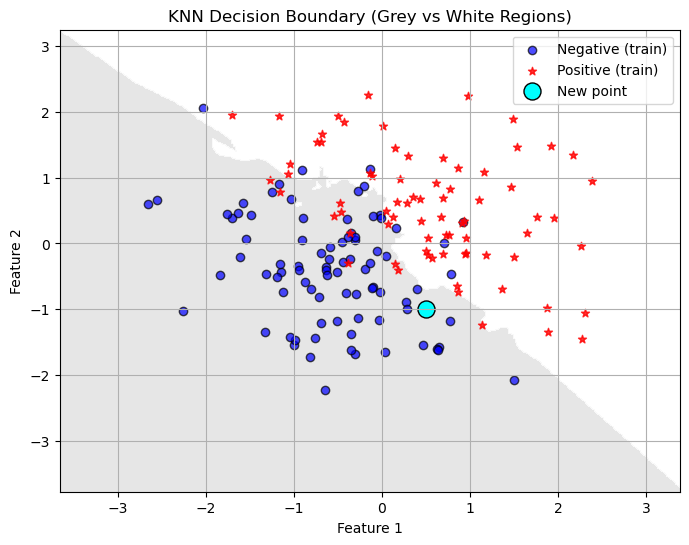

In [36]:
# --- Create mesh grid for decision boundary ---
h = 0.02  # grid step size
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each grid point
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary with grey and white shading
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, levels=[-0.5, 0.5, 1.5], 
             colors=['#E0E0E0', 'white'], alpha=0.8)

# Plot the training data
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], 
            color='blue', alpha=0.7, edgecolor='k', label='Negative (train)')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], 
            color='red', alpha=0.8, marker='*', label='Positive (train)')

# Plot the new point
plt.scatter(new_point[0, 0], new_point[0, 1], 
            color='cyan', s=150, edgecolor='k', label='New point')

plt.title("KNN Decision Boundary (Grey vs White Regions)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


2. We can output information about the confusion matrix and classification report. This works even with higher dimensional data. Always a good idea to check out these numbers. How do they change as we increase $k$?

In [38]:
y_pred = knn.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {acc:.3f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on test set: 0.900
Confusion Matrix:
[[22  2]
 [ 2 14]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.88      0.88      0.88        16

    accuracy                           0.90        40
   macro avg       0.90      0.90      0.90        40
weighted avg       0.90      0.90      0.90        40



## You Try

Make changes to the number of neighbors in the code above. How does changing the value of $k$ (the number of neighbors) change the decision boundary?

Does a lower value of $k$ seem to overfit or underfit the data? How do you know?

## Hyperparameter Tuning

A big question that comes out of our KNN model is: How many neighbors should we choose? This is where doing a systematic test is really helpful! 

## Plotting Training and Testing Accuracy

One great way to visualize how well you are doing with a task is to plot how the accuracy (or error in some cases) changes on BOTH the training and testing set as you change a parameter. 

- You want your model to do well on BOTH the training and testing set.
- Underfitting is when your model does not do particularly well on either the testing or training set. Usually when you have not trained enough or when you have picked a model that is too simple for the task. Think straight line fits for curved data or really unreliable decision boundaries.
- Overfitting is when you model does really well on the training set but not very well on the testing set. This means your model is memorizing the training data and will not generalize well to new data. Typically happens when you train too much or when you have picked a model that is too complicated for the task. Think really curvy fits that go through almost every point or decision boundaries with lots of jagged edges.

## Example of exploring Hyperparameters

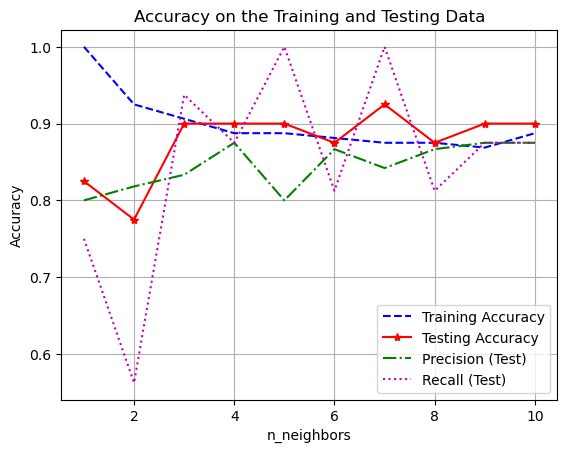

In [40]:
#1 Choose a range for your hyperparameters
k_vals = [1,2,3,4,5,6,7,8,9,10]

#2 Loop through the parameters and retrain your model
#     IMPORTANT - I do not redo the test train split!
#                 Do the split only once.

# An empty list for collecting the accuracy numbers
acc_train = []
acc_test = []
prec_test = []
rec_test = []
for k in k_vals:
    # Train the model with k-neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # Get the accuracy on training data
    y_pred_train = knn.predict(X_train)
    acc_train.append(accuracy_score(y_train,y_pred_train))

    # Get the accuracy on testing data
    y_pred_test = knn.predict(X_test)
    # Add the accuracy to the list
    acc_test.append(accuracy_score(y_test, y_pred_test))
    prec_test.append(precision_score(y_test, y_pred_test))
    rec_test.append(recall_score(y_test, y_pred_test))

# 2 Plot the results

plt.plot(k_vals,acc_train,'--b',label='Training Accuracy')
plt.plot(k_vals,acc_test,'-*r',label='Testing Accuracy')
plt.plot(k_vals, prec_test, '-.g', label='Precision (Test)')
plt.plot(k_vals, rec_test, ':m', label='Recall (Test)')
plt.grid()
plt.legend()
plt.title('Accuracy on the Training and Testing Data')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

The **best** number of neighbors is probably somewhere in the middle. Depending on what is most important for your given application. Do you need high precision or recall? Is accuracy most important?


## KNN Regression

We can use KNN for regression tasks too! It works the same way, except instead of having the neighbors vote on what class the new point should belong to, you take an average of the neighbors values.

Here is regression data - remember in regression we are trying to predict a continuous numerical outcome.

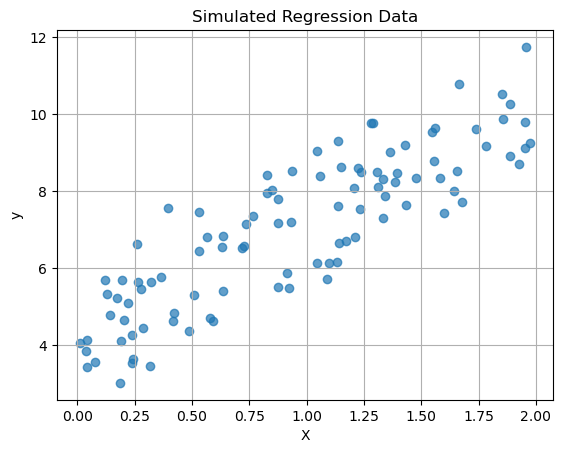

In [42]:
# Generate a synthetic dataset
np.random.seed(0)
n_samples = 100
X = 2.0 * np.random.rand(n_samples, 1)
y = 4.0 + 3.0 * X[:,0] + np.random.randn(n_samples)

plt.scatter(X, y, alpha=0.7)
plt.title("Simulated Regression Data")
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.show()

Last time we did a linear regression of this data, let's see what KNN does with this data and compare the two models!

In [44]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Make a line for looking at the model outputs
X_line = np.linspace(0, 2, 100).reshape(-1, 1)

In [46]:
# Linear Regression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# --- Get predictions and line ---
y_pred_linreg = linreg.predict(X_test)
y_pred_line_linreg = linreg.predict(X_line)

# Get the metrics
mse = mean_squared_error(y_test, y_pred_linreg)
r2 = r2_score(y_test, y_pred_linreg)
print(f"MSE on test set: {mse:.3f}")
print(f"R² on test set: {r2:.3f}")

MSE on test set: 0.918
R² on test set: 0.652


In [48]:
# A new package:
from sklearn.neighbors import KNeighborsRegressor

# KNN Regression
k=10
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)

# --- Get predictions and line ---
y_pred_knn = knn_reg.predict(X_test)
y_pred_line_knn = knn_reg.predict(X_line)

mse = mean_squared_error(y_test, y_pred_knn)
r2 = r2_score(y_test, y_pred_knn)
print(f"MSE on test set: {mse:.3f}")
print(f"R² on test set: {r2:.3f}")

MSE on test set: 1.132
R² on test set: 0.571


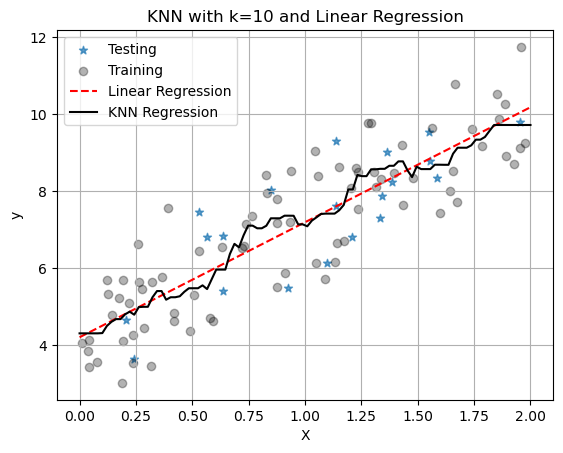

In [50]:
plt.scatter(X_test, y_test, marker='*', alpha=0.7,label='Testing')
plt.scatter(X_train,y_train, color='black', alpha=0.3,label='Training')
plt.plot(X_line,y_pred_line_linreg,'r--',label='Linear Regression')
plt.plot(X_line,y_pred_line_knn,'k-',label='KNN Regression')
plt.title(f"KNN with k={k} and Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.grid()
plt.legend()
plt.show()

With only one neighbor, KNN just fits a line between all the points and we see that it has worse metrics: higher MSE and lower $R^2$. But remember we chose $k=1$ here and it is our job to pick a good value for $k$. It might also be that linear regression is the better model. Again, it is our job to figure this out for our data set and application!


## You Try:

What happens as K is increased?

For regression, does a lower value of $k$ seem to overfit or underfit the data? How do you know?